In [2]:
using HiddenMarkovModels
using DriftDiffusionModels
using Plots
using LinearAlgebra

In [ ]:
# Create a true HMMDDM
true_trans = [0.9 0.1; 0.2 0.8]
true_init = [0.99, 0.01]

B_1 = 12
v1 = 1.25
a_0 = 0.7

B_2 = 2.0
v1 = 2.0
a_0 = 0.5

DDM1 = DriftDiffusionModel(B_1, v1, a_0, 1.0)
DDM2 = DriftDiffusionModel(B_2, v1, a_0, 1.0)

dists_true = [DDM1, DDM2]

hmm = HMM(true_init, true_trans, dists_true)

# sample from the true model
state_seq_true, obs_seq_true = rand(hmm, 10000)

(state_seq = [1, 1, 2, 2, 2, 2, 2, 1, 1, 1  …  2, 2, 2, 2, 2, 1, 1, 1, 2, 1], obs_seq = DDMResult[DDMResult(2.0239739999290025, 1), DDMResult(2.4218819999846213, 1), DDMResult(0.24503300000022438, 1), DDMResult(0.14969200000012903, 1), DDMResult(1.2396409999882037, 1), DDMResult(0.9091080000053046, 1), DDMResult(0.3824189999966864, -1), DDMResult(3.716890000165635, 1), DDMResult(2.140733999945323, 1), DDMResult(2.0120419999273347, 1)  …  DDMResult(0.11406200000009341, 1), DDMResult(0.5221679999941778, 1), DDMResult(0.46678499999442913, 1), DDMResult(0.7931500000019701, 1), DDMResult(0.18914700000016849, 1), DDMResult(2.342446999973518, 1), DDMResult(3.2565800001012937, 1), DDMResult(2.9180500000539746, 1), DDMResult(0.5431529999947813, 1), DDMResult(2.5069899999965175, 1)])

In [4]:
# fit a naive hmm to the data
trans_guess = [0.95 0.05; 0.05 0.95]
init_guess = [0.5, 0.5]

B_1_guess = 10
v1_guess = 1.0
a_0_guess = 0.5

B_2_guess = 1
v2_guess = 1.0
a_0_guess = 0.5

DDM1_guess = DriftDiffusionModel(B_1_guess, v1_guess, a_0_guess, 1.0)
DDM2_guess = DriftDiffusionModel(B_2_guess, v2_guess, a_0_guess, 1.0)

dists_guess = [DDM1_guess, DDM2_guess]

# create some priors
α₀ = ones(2)
αₜ = ones(2, 2)
αₜ[diagind(αₜ)] .= 2.0

hmm_guess = PriorHMM(init_guess, trans_guess, dists_guess, αₜ, α₀)

hmm_est, lls = baum_welch(hmm_guess, obs_seq_true; loglikelihood_increasing=false)

(PriorHMM{Float64, DriftDiffusionModel}([1.0, 2.6399538759446704e-24], [0.8981706729700438 0.10182932702995617; 0.2079460341247796 0.7920539658752205], DriftDiffusionModel[DriftDiffusionModel(18.20476682076034, 2.0065534247001087, 0.6680519721281091, 1.0), DriftDiffusionModel(2.0336555347118614, 1.9836443730714106, 0.5115830526927816, 1.0)], [2.0 1.0; 1.0 2.0], [1.0, 1.0]), [-20398.741095036068, -12273.106278969553, -12263.595832383819, -12262.896133248494, -12262.824227166766, -12262.816361276131, -12262.815495234327, -12262.815399082867, -12262.815388370733, -12262.815387176877])

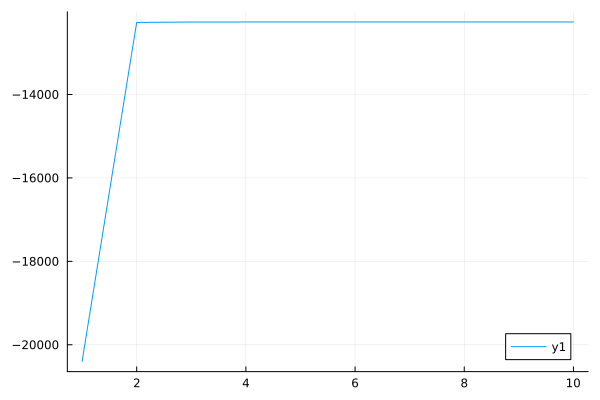

In [5]:
plot(lls)

In [6]:
posterior = forward(hmm_est, obs_seq_true)

([1.0 0.9993897529337561 … 8.3990709812329e-9 0.9850565882080956; 7.550446268060124e-26 0.0006102470662437873 … 0.999999991600929 0.014943411791904442], [-12263.86116048435])

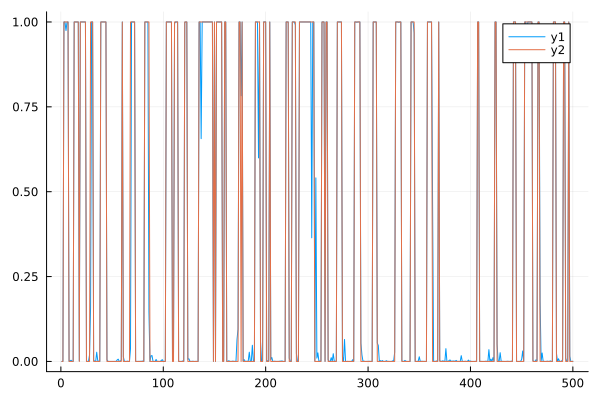

In [7]:
plot(posterior[1]'[1:500, 2])
plot!(state_seq_true[1:500] .- 1)